<a href="https://colab.research.google.com/github/rendrasatriar/Density-SILO/blob/Bintangor/Bintangor_SAP_Sap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
!pip install --quiet google-cloud-bigquery pandas pyarrow

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [288]:
from google.cloud import bigquery
import pandas as pd

PROJECT_ID = "study-density-silo"
DATASET_ID = "study_density"
TABLE_ID = "raw_data_bintangor"

client = bigquery.Client(project=PROJECT_ID)

def fetch_single_block(project: str, dataset: str, table_id: str, max_rows: int = None) -> pd.DataFrame:
    table_full = f"{project}.{dataset}.{table_id}"
    query = f"SELECT * FROM `{table_full}`"
    job = client.query(query)
    if max_rows:
        return job.result(max_results=max_rows).to_dataframe()
    return job.to_dataframe()

In [289]:
# --- Ambil data satu blok ---
df_block = fetch_single_block(PROJECT_ID, DATASET_ID, TABLE_ID)
print(f"Loaded table: {PROJECT_ID}.{DATASET_ID}.{TABLE_ID}")
print("Rows:", len(df_block))
print("Columns:", len(df_block.columns))
print("Shape:", df_block.shape)
print("-" * 60)

# --- Informasi kolom dan tipe data ---
print("\nColumn info:")
print(df_block.dtypes)
print("\nMemory usage (MB):")
print(df_block.memory_usage(deep=True).sum() / 1024**2)

# --- Statistik numerik singkat ---
print("\nDescriptive statistics (numeric columns):")
display(df_block.describe().transpose())

# --- Distribusi kategori penting ---
if 'GEN_LYR' in df_block.columns:
    print("\nUnique GEN_LYR count:", df_block['GEN_LYR'].nunique())
    print("Top GEN_LYR value counts:")
    display(df_block['GEN_LYR'].value_counts().head(20))

if 'Material' in df_block.columns:
    print("\nUnique Material count:", df_block['Material'].nunique())
    print("Top Material value counts:")
    display(df_block['Material'].value_counts().head(20))

# --- Quick QAQC checks ---
print("\nQAQC checks:")
if {'Interval','From','To'}.issubset(df_block.columns):
    n_bad_interval = len(df_block[(df_block['Interval'] <= 0) | (df_block['To'] <= df_block['From'])])
    print("Rows with Interval <= 0 or To <= From:", n_bad_interval)
else:
    print("Columns Interval/From/To not all present for QAQC checks.")

Loaded table: study-density-silo.study_density.raw_data_bintangor
Rows: 11548
Columns: 16
Shape: (11548, 16)
------------------------------------------------------------

Column info:
HoleId         object
Hill           object
Hill_Group     object
From          float64
To            float64
Interval      float64
CoreRec       float64
WetW          float64
H2O           float64
DryW          float64
Material       object
Layer          object
NEW_LYR        object
GEN_LYR        object
WTF           float64
DTF           float64
dtype: object

Memory usage (MB):
4.864101409912109

Descriptive statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
From,11548.0,5.680615,3.949815,0.000000,2.600000,5.075000,8.000000,23.000000
To,11548.0,6.448785,3.934414,0.200000,3.000000,6.000000,9.000000,23.900000
Interval,11548.0,0.768170,0.290259,0.050000,0.500000,1.000000,1.000000,3.000000
CoreRec,11548.0,1.081167,0.188022,0.200000,1.000000,1.000000,1.090000,3.500000
WetW,11548.0,4.179988,1.862441,0.400000,2.640000,4.259500,5.515000,13.340000
H2O,11548.0,25.032835,14.841084,0.079000,12.402250,25.364500,36.083250,90.147000
DryW,11548.0,3.181767,1.628951,0.156000,1.835000,3.057500,4.336000,11.840000
WTF,11548.0,1.756388,0.571895,0.195304,1.489770,1.723069,1.953043,23.925631
DTF,11548.0,1.335409,0.587918,0.123134,0.992927,1.266640,1.612504,22.471965



Unique GEN_LYR count: 5
Top GEN_LYR value counts:


,count
GEN_LYR,
LIM,5803
BRK,2925
SAP,2291
SAPX,312
LIMX,217



Unique Material count: 50
Top Material value counts:


,count
Material,
YLIM,2423
Rlim,1583
ESAP,1572
HGT,933
HSAP,882
RSAP,831
Sap,700
RLIM,380
DNT,365



QAQC checks:
Rows with Interval <= 0 or To <= From: 0


# Filter By GEN_LYR dan Material

In [308]:

gen_lyr_input = input("Masukkan GEN_LYR yang ingin difilter: ").strip()
material_input = input("Masukkan Material yang ingin difilter: ").strip()

df_filtered = df_block.copy()

if 'GEN_LYR' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['GEN_LYR'].str.upper() == gen_lyr_input.upper()]

if 'Material' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Material'].str.upper() == material_input.upper()]

print(f"\nFiltered rows: {len(df_filtered)}")
display(df_filtered.head(133))

Masukkan GEN_LYR yang ingin difilter: SAP
Masukkan Material yang ingin difilter: Sap

Filtered rows: 543


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
833,CS7210128,Bintangor Blok 2 Spasi 50,BINTANGOR,0.30,1.00,0.70,1.50,4.284,20.635,3.400,Sap,None,SAP,SAP,1.395519,1.107555
955,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,0.85,1.00,0.15,1.35,0.944,40.042,0.566,Sap,None,ESAP,SAP,1.594493,0.956020
2687,CS6210159,Bintangor Blok 2 Spasi 25,BINTANGOR,2.00,3.00,1.00,1.00,3.945,27.275,2.869,Sap,None,SAP,SAP,1.349344,0.981310
2873,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,2.60,3.00,0.40,1.00,1.632,37.868,1.014,Sap,None,ESAP,SAP,1.395519,0.867069
3008,CS6210146,Bintangor Blok 2 Spasi 25,BINTANGOR,3.00,3.50,0.50,1.00,1.882,33.900,1.244,Sap,None,ESAP,SAP,1.287435,0.850993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,CS7210248,Bintangor Blok 1 Spasi 50,BINTANGOR,5.50,6.00,0.50,1.10,1.950,64.103,0.700,Sap,None,ESAP,SAP,1.212684,0.435322
6007,CS7210277R,Bintangor Blok 1 Spasi 50,BINTANGOR,5.50,6.00,0.50,1.40,2.780,37.770,1.730,Sap,None,SAP,SAP,1.358384,0.845325
6015,CS6210123,Bintangor Blok 2 Spasi 25,BINTANGOR,5.50,6.00,0.50,1.00,1.940,27.320,1.410,Sap,None,SAP,SAP,1.327111,0.964550
6020,CS7210341,Bintangor Blok 1 Spasi 50,BINTANGOR,5.52,6.00,0.48,1.15,1.900,52.632,0.900,Sap,None,ESAP,SAP,1.177308,0.557672


# Filter By Interval

Descriptive statistics for Interval:
Count: 543
Mean: 0.543186
Standard Error: 0.011333
Median: 0.5
Mode: 1.0
Standard Deviation: 0.264086
Sample Variance: 0.069742
Kurtosis: -0.160067
Skewness: 0.669325
Range: 1.4
Minimum: 0.1
Maximum: 1.5
Sum: 294.95000000000005
Confidence Level (95%): ±0.022262

Bin calculation:
Freedman–Diaconis -> bins: 17, bin width: 0.085802
Sturges -> bins: 11, bin width: 0.127273


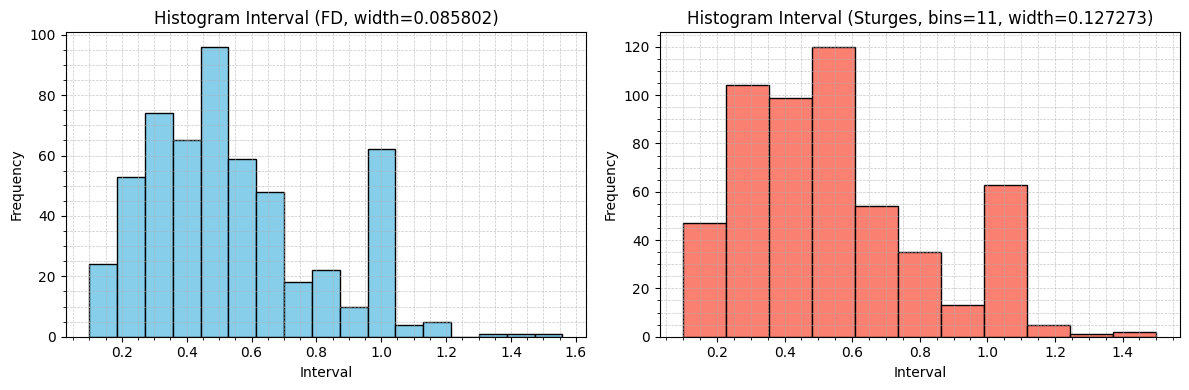


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.100000,0.185802,24
1,0.185802,0.271604,53
2,0.271604,0.357406,74
3,0.357406,0.443209,65
4,0.443209,0.529011,96
5,0.529011,0.614813,59
6,0.614813,0.700615,48
7,0.700615,0.786417,18
8,0.786417,0.872219,22
9,0.872219,0.958021,10



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.100000,0.227273,47
1,0.227273,0.354545,104
2,0.354545,0.481818,99
3,0.481818,0.609091,120
4,0.609091,0.736364,54
5,0.736364,0.863636,35
6,0.863636,0.990909,13
7,0.990909,1.118182,63
8,1.118182,1.245455,5
9,1.245455,1.372727,1


In [309]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return int(np.sqrt(n)), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series):
    data = series.dropna().values
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = stats.sem(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0] if n > 0 else None
    var = np.var(data, ddof=1)
    kurt = stats.kurtosis(data)
    skew = stats.skew(data)
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else None

    print("Descriptive statistics for Interval:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}")
    print(f"Sample Variance: {var:.6f}")
    print(f"Kurtosis: {kurt:.6f}")
    print(f"Skewness: {skew:.6f}")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}")

def plot_interval_histograms(df_filtered):
    if 'Interval' not in df_filtered.columns:
        print("Kolom 'Interval' tidak ada di dataframe.")
        return

    data = df_filtered['Interval'].dropna()

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data)

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins: {bins_fd}, bin width: {width_fd_str}")
    print(f"Sturges -> bins: {bins_st}, bin width: {width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram Interval (FD, width={width_fd_str})")
    axes[0].set_xlabel("Interval")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram Interval (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("Interval")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
interval_data = plot_interval_histograms(df_filtered) # Corrected function call

In [310]:
# Pastikan df_filtered sudah ada
# Contoh: df_filtered = filter_data(df_block, "LIM", "RLIM")

# Minta input dari user
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter data sesuai input
df_interval = df_filtered[(df_filtered['Interval'] >= lower_bound) &
                       (df_filtered['Interval'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_interval)}")
display(df_interval.head(50))

Masukkan batas bawah (is greater than or equal to): 0.100000
Masukkan batas atas (is less than or equal to): 0.990909

Filtered rows: 472


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
833,CS7210128,Bintangor Blok 2 Spasi 50,BINTANGOR,0.30,1.00,0.70,1.50,4.284,20.635,3.400,Sap,None,SAP,SAP,1.395519,1.107555
955,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,0.85,1.00,0.15,1.35,0.944,40.042,0.566,Sap,None,ESAP,SAP,1.594493,0.956020
2873,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,2.60,3.00,0.40,1.00,1.632,37.868,1.014,Sap,None,ESAP,SAP,1.395519,0.867069
3008,CS6210146,Bintangor Blok 2 Spasi 25,BINTANGOR,3.00,3.50,0.50,1.00,1.882,33.900,1.244,Sap,None,ESAP,SAP,1.287435,0.850993
3720,CS7210162,Bintangor Blok 1 Spasi 50,BINTANGOR,3.15,3.50,0.35,1.57,2.020,60.396,0.800,Sap,None,SAP,SAP,1.257359,0.497964
3751,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,3.25,4.10,0.85,1.00,4.040,35.693,2.598,Sap,None,SAP,SAP,1.625691,1.045432
3787,CS7210155,Bintangor Blok 1 Spasi 50,BINTANGOR,3.38,3.76,0.38,1.58,2.310,54.978,1.040,Sap,None,ESAP,SAP,1.315973,0.592473
3794,CS6210150,Bintangor Blok 2 Spasi 25,BINTANGOR,3.40,4.00,0.60,1.00,3.136,25.255,2.344,Sap,None,ESAP,SAP,1.787724,1.336233
3795,CS7210120,Bintangor Blok 2 Spasi 50,BINTANGOR,3.40,4.00,0.60,1.65,2.718,49.080,1.384,Sap,None,ESAP,SAP,0.939053,0.478164
3815,CS7210166,Bintangor Blok 1 Spasi 50,BINTANGOR,3.40,4.00,0.60,0.75,1.940,43.299,1.100,Sap,None,SAP,SAP,1.474568,0.836095


# Filter By Recovery


Descriptive statistics for CoreRec:
Count: 472
Mean: 1.157879
Standard Error: 0.012921
Median: 1.0
Mode: 1.0
Standard Deviation: 0.280709
Sample Variance: 0.078797
Kurtosis: 12.361094
Skewness: 2.646321
Range: 2.95
Minimum: 0.55
Maximum: 3.5
Sum: 546.519
Confidence Level (95%): ±0.025389

Bin calculation:
Freedman–Diaconis -> bins=46, width=0.064218
Sturges -> bins=10, width=0.295000


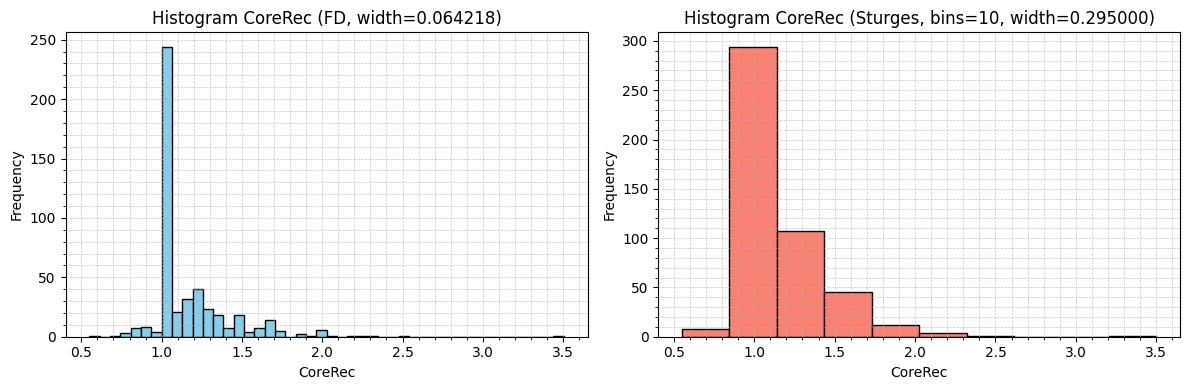


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.550000,0.614218,1
1,0.614218,0.678436,0
2,0.678436,0.742654,1
3,0.742654,0.806872,3
4,0.806872,0.871089,7
5,0.871089,0.935307,8
6,0.935307,0.999525,4
7,0.999525,1.063743,244
8,1.063743,1.127961,21
9,1.127961,1.192179,32



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.550,0.845,8
1,0.845,1.140,294
2,1.140,1.435,107
3,1.435,1.730,45
4,1.730,2.025,12
5,2.025,2.320,4
6,2.320,2.615,1
7,2.615,2.910,0
8,2.910,3.205,0
9,3.205,3.500,1


In [311]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="CoreRec"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_coreRec(df_interval):
    if 'CoreRec' not in df_interval.columns:
        print("Kolom 'CoreRec' tidak ada di dataframe.")
        return

    data = df_interval['CoreRec'].dropna()
    if data.empty:
        print("Tidak ada data 'CoreRec' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="CoreRec")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram CoreRec (FD, width={width_fd_str})")
    axes[0].set_xlabel("CoreRec")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram CoreRec (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("CoreRec")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
coreRec_data = analyze_coreRec(df_interval)

In [312]:
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))


df_recovery = df_interval[(df_interval['CoreRec'] >= lower_bound) &
                       (df_interval['CoreRec'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_recovery)}")
display(df_recovery.head(47))

Masukkan batas bawah (is greater than or equal to): 0.845
Masukkan batas atas (is less than or equal to): 1.730

Filtered rows: 446


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
833,CS7210128,Bintangor Blok 2 Spasi 50,BINTANGOR,0.30,1.00,0.70,1.50,4.284,20.635,3.400,Sap,None,SAP,SAP,1.395519,1.107555
955,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,0.85,1.00,0.15,1.35,0.944,40.042,0.566,Sap,None,ESAP,SAP,1.594493,0.956020
2873,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,2.60,3.00,0.40,1.00,1.632,37.868,1.014,Sap,None,ESAP,SAP,1.395519,0.867069
3008,CS6210146,Bintangor Blok 2 Spasi 25,BINTANGOR,3.00,3.50,0.50,1.00,1.882,33.900,1.244,Sap,None,ESAP,SAP,1.287435,0.850993
3720,CS7210162,Bintangor Blok 1 Spasi 50,BINTANGOR,3.15,3.50,0.35,1.57,2.020,60.396,0.800,Sap,None,SAP,SAP,1.257359,0.497964
3751,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,3.25,4.10,0.85,1.00,4.040,35.693,2.598,Sap,None,SAP,SAP,1.625691,1.045432
3787,CS7210155,Bintangor Blok 1 Spasi 50,BINTANGOR,3.38,3.76,0.38,1.58,2.310,54.978,1.040,Sap,None,ESAP,SAP,1.315973,0.592473
3794,CS6210150,Bintangor Blok 2 Spasi 25,BINTANGOR,3.40,4.00,0.60,1.00,3.136,25.255,2.344,Sap,None,ESAP,SAP,1.787724,1.336233
3795,CS7210120,Bintangor Blok 2 Spasi 50,BINTANGOR,3.40,4.00,0.60,1.65,2.718,49.080,1.384,Sap,None,ESAP,SAP,0.939053,0.478164
3839,CS7210328,Bintangor Blok 1 Spasi 50,BINTANGOR,3.50,4.00,0.50,1.10,2.130,50.235,1.060,Sap,None,ESAP,SAP,1.324624,0.659203


# Filter By Wet Weight

Tidak ada data dengan Interval=1.0 dan CoreRec=1.0.
Menggunakan seluruh data sebagai acuan residual.

Residual IQR acuan:
Q1: -0.323, Q3: 0.267, IQR: 0.590
Lower margin: -1.208, Upper margin: 1.152


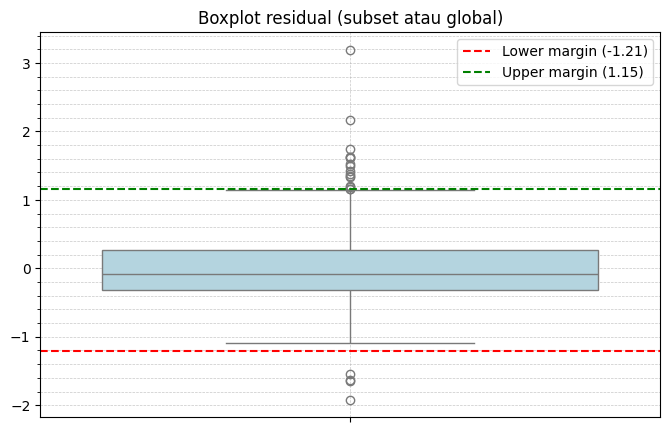

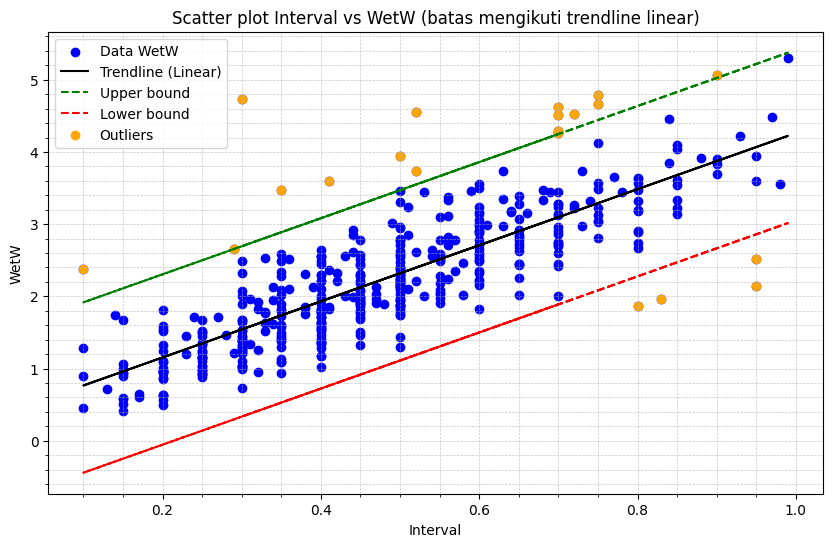


Outlier WetW berdasarkan trendline linear + IQR residual acuan:
         HoleId                       Hill Hill_Group  From    To  Interval  \
833   CS7210128  Bintangor Blok 2 Spasi 50  BINTANGOR   0.3  1.00      0.70   
5871  CS7210100  Bintangor Blok 2 Spasi 50  BINTANGOR   5.3  6.00      0.70   
5977  CS6210090  Bintangor Blok 2 Spasi 25  BINTANGOR   5.5  6.45      0.95   
6427  CS7210264  Bintangor Blok 1 Spasi 50  BINTANGOR   6.0  6.29      0.29   
6874  CS7210113  Bintangor Blok 2 Spasi 50  BINTANGOR   6.1  6.80      0.70   

      CoreRec   WetW     H2O   DryW Material Layer NEW_LYR GEN_LYR       WTF  \
833      1.50  4.284  20.635  3.400      Sap  None     SAP     SAP  1.395519   
5871     1.70  4.518  50.775  2.224      Sap  None     SAP     SAP  1.298599   
5977     1.00  2.150  35.442  1.388      Sap  None    ESAP     SAP  0.774088   
6427     1.72  2.660  60.902  1.040      Sap  None    ESAP     SAP  1.824025   
6874     1.55  4.620  45.628  2.512      Sap  None    ESAP  

In [313]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['WetW'], color='blue', label='Data WetW')
    plt.plot(df_recovery['Interval'], y_pred, color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], y_pred + upper_margin, color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], y_pred + lower_margin, color='red', linestyle='--', label='Lower bound')

    # Outlier = data di luar batas trendline ± margin
    outliers = df_recovery[(df_recovery['WetW'] > y_pred + upper_margin) |
                           (df_recovery['WetW'] < y_pred + lower_margin)]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("WetW")
    plt.legend()
    plt.show()

    return {
        "outliers": outliers,
        "margins": {"lower": lower_margin, "upper": upper_margin},
        "trendline_coef": {"slope": model.coef_[0], "intercept": model.intercept_}
    }

# --- Contoh pemanggilan ---
result = detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
if result:
    print("\nOutlier WetW berdasarkan trendline linear + IQR residual acuan:")
    print(result["outliers"].head())

## Normalisasi Weight terhadap recovery

In [315]:
import numpy as np
from IPython.display import display

def normalize_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns or 'CoreRec' not in df_recovery.columns:
        print("Kolom 'WetW' atau 'CoreRec' tidak ada di dataframe.")
        return df_recovery

    # Buat kolom baru Normalized_WetW
    df_recovery['Normalized_WetW'] = np.where(
        df_recovery['CoreRec'] > 1.0,
        df_recovery['WetW'] / 1,          # jika CoreRec > 1.0
        df_recovery['WetW'] / df_recovery['CoreRec']  # jika CoreRec <= 1.0
    )

    print("\nNormalisasi WetW terhadap Recovery selesai.")
    # tampilkan seluruh dataframe dengan kolom tambahan
    display(df_recovery)

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = normalize_wetw(df_recovery)


Normalisasi WetW terhadap Recovery selesai.


/tmp/ipython-input-7809237.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Normalized_WetW'] = np.where(


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
833,CS7210128,Bintangor Blok 2 Spasi 50,BINTANGOR,0.30,1.00,0.70,1.50,4.284,20.635,3.400,Sap,None,SAP,SAP,1.395519,1.107555,4.284
955,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,0.85,1.00,0.15,1.35,0.944,40.042,0.566,Sap,None,ESAP,SAP,1.594493,0.956020,0.944
2873,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,2.60,3.00,0.40,1.00,1.632,37.868,1.014,Sap,None,ESAP,SAP,1.395519,0.867069,1.632
3008,CS6210146,Bintangor Blok 2 Spasi 25,BINTANGOR,3.00,3.50,0.50,1.00,1.882,33.900,1.244,Sap,None,ESAP,SAP,1.287435,0.850993,1.882
3720,CS7210162,Bintangor Blok 1 Spasi 50,BINTANGOR,3.15,3.50,0.35,1.57,2.020,60.396,0.800,Sap,None,SAP,SAP,1.257359,0.497964,2.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11457,CS6210166,Bintangor Blok 2 Spasi 25,BINTANGOR,17.65,18.00,0.35,1.00,1.895,38.206,1.171,Sap,None,SAP,SAP,1.851897,1.144365,1.895
11460,CS6210185,Bintangor Blok 2 Spasi 25,BINTANGOR,17.85,18.30,0.45,1.00,1.718,45.402,0.938,Sap,None,SAP,SAP,1.305829,0.712961,1.718
11481,CS7210075,Bintangor Blok 2 Spasi 50,BINTANGOR,18.10,18.30,0.20,1.00,0.964,49.378,0.488,Sap,None,SAP,SAP,1.648628,0.834575,0.964
11490,CS7210095,Bintangor Blok 2 Spasi 50,BINTANGOR,18.60,18.75,0.15,1.00,1.000,37.000,0.630,Sap,None,SAP,SAP,2.280260,1.436564,1.000


Tidak ada data dengan Interval=1.0 dan CoreRec=1.0.
Menggunakan seluruh data sebagai acuan residual.

Residual IQR acuan:
Q1: -0.324, Q3: 0.256, IQR: 0.581
Lower margin: -1.195, Upper margin: 1.127


/tmp/ipython-input-1577443899.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
/tmp/ipython-input-1577443899.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Outlier_Status'] = [


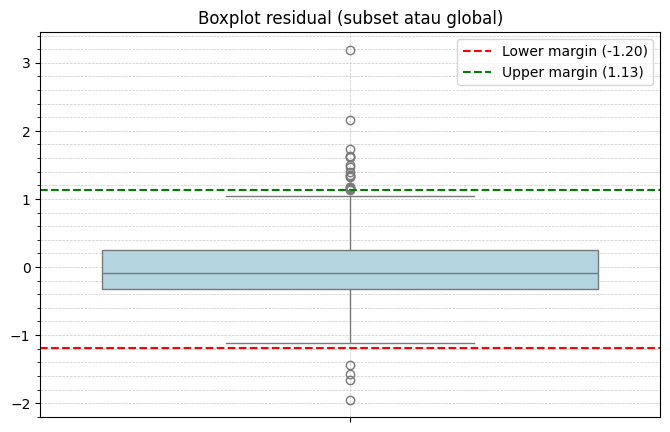

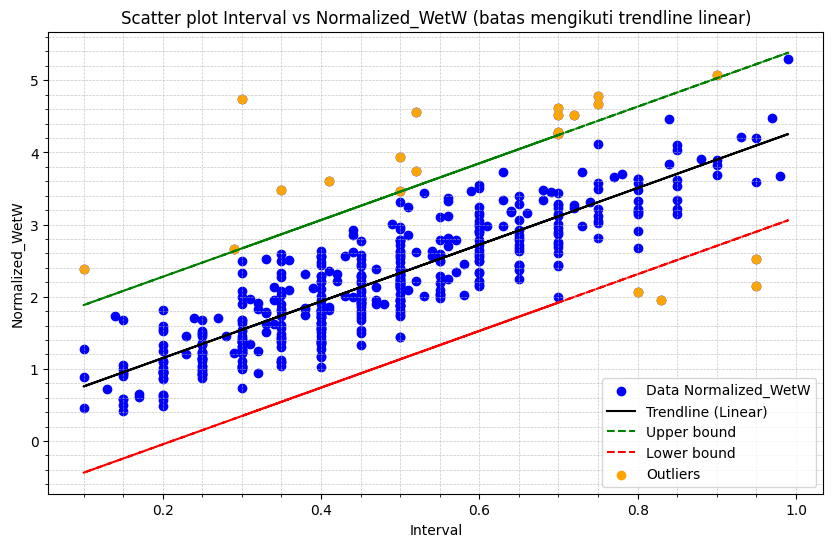

,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred,Outlier_Status
833,CS7210128,Bintangor Blok 2 Spasi 50,BINTANGOR,0.30,1.00,0.70,1.50,4.284,20.635,3.400,Sap,None,SAP,SAP,1.395519,1.107555,4.284000,3.115074,Outlier atas
955,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,0.85,1.00,0.15,1.35,0.944,40.042,0.566,Sap,None,ESAP,SAP,1.594493,0.956020,0.944000,0.953138,Normal
2873,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,2.60,3.00,0.40,1.00,1.632,37.868,1.014,Sap,None,ESAP,SAP,1.395519,0.867069,1.632000,1.935836,Normal
3008,CS6210146,Bintangor Blok 2 Spasi 25,BINTANGOR,3.00,3.50,0.50,1.00,1.882,33.900,1.244,Sap,None,ESAP,SAP,1.287435,0.850993,1.882000,2.328915,Normal
3720,CS7210162,Bintangor Blok 1 Spasi 50,BINTANGOR,3.15,3.50,0.35,1.57,2.020,60.396,0.800,Sap,None,SAP,SAP,1.257359,0.497964,2.020000,1.739296,Normal
3751,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,3.25,4.10,0.85,1.00,4.040,35.693,2.598,Sap,None,SAP,SAP,1.625691,1.045432,4.040000,3.704693,Normal
3787,CS7210155,Bintangor Blok 1 Spasi 50,BINTANGOR,3.38,3.76,0.38,1.58,2.310,54.978,1.040,Sap,None,ESAP,SAP,1.315973,0.592473,2.310000,1.857220,Normal
3794,CS6210150,Bintangor Blok 2 Spasi 25,BINTANGOR,3.40,4.00,0.60,1.00,3.136,25.255,2.344,Sap,None,ESAP,SAP,1.787724,1.336233,3.136000,2.721994,Normal
3795,CS7210120,Bintangor Blok 2 Spasi 50,BINTANGOR,3.40,4.00,0.60,1.65,2.718,49.080,1.384,Sap,None,ESAP,SAP,0.939053,0.478164,2.718000,2.721994,Normal
3839,CS7210328,Bintangor Blok 1 Spasi 50,BINTANGOR,3.50,4.00,0.50,1.10,2.130,50.235,1.060,Sap,None,ESAP,SAP,1.324624,0.659203,2.130000,2.328915,Normal


In [316]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs Normalized_WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['Normalized_WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['Normalized_WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Tambahkan kolom status outlier ---
    def classify_outlier(val, pred):
        if val < pred + lower_margin:
            return "Outlier bawah"
        elif val > pred + upper_margin:
            return "Outlier atas"
        else:
            return "Normal"

    df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
    df_recovery['Outlier_Status'] = [
        classify_outlier(val, pred)
        for val, pred in zip(df_recovery['Normalized_WetW'], df_recovery['Trendline_Pred'])
    ]

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['Normalized_WetW'], color='blue', label='Data Normalized_WetW')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'], color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + upper_margin,
             color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + lower_margin,
             color='red', linestyle='--', label='Lower bound')

    # Outlier ditandai oranye
    outliers = df_recovery[df_recovery['Outlier_Status'] != "Normal"]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['Normalized_WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs Normalized_WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("Normalized_WetW")
    plt.legend()
    plt.show()

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
display(df_recovery.head(15))


Bin calculation:
Freedman–Diaconis -> bins=15, width=0.331269
Sturges -> bins=10, width=0.489000


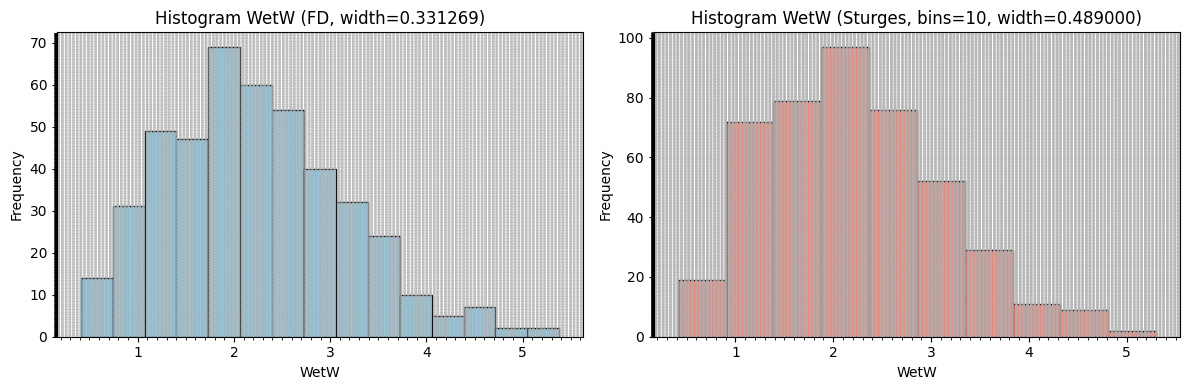


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.410000,0.741269,14
1,0.741269,1.072538,31
2,1.072538,1.403806,49
3,1.403806,1.735075,47
4,1.735075,2.066344,69
5,2.066344,2.397613,60
6,2.397613,2.728882,54
7,2.728882,3.060150,40
8,3.060150,3.391419,32
9,3.391419,3.722688,24



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.410,0.899,19
1,0.899,1.388,72
2,1.388,1.877,79
3,1.877,2.366,97
4,2.366,2.855,76
5,2.855,3.344,52
6,3.344,3.833,29
7,3.833,4.322,11
8,4.322,4.811,9
9,4.811,5.300,2


In [317]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def analyze_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns:
        print("Kolom 'WetW' tidak ada di dataframe.")
        return

    data = df_recovery['WetW'].dropna()
    if data.empty:
        print("Tidak ada data 'WetW' yang valid setelah drop NaN.")
        return

    # --- hitung jumlah bins ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram WetW (FD, width={width_fd_str})")
    axes[0].set_xlabel("WetW")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram WetW (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("WetW")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
wetw_data = analyze_wetw(df_recovery)

In [336]:
import numpy as np
from IPython.display import display

def filter_wetw_normal(df_recovery, lower_bound, upper_bound):
    """
    Filter data WetW berdasarkan batas bawah/atas,
    sekaligus memastikan hanya baris dengan Outlier_Status = 'Normal' yang lolos.
    Setelah selesai, kolom Outlier_Status dihapus.
    """
    # --- Filter berdasarkan WetW ---
    df_wetw = df_recovery[(df_recovery['WetW'] >= lower_bound) &
                          (df_recovery['WetW'] <= upper_bound)].copy()

    # --- Pastikan hanya baris Normal yang lolos ---
    if 'Outlier_Status' in df_wetw.columns:
        df_wetw = df_wetw[df_wetw['Outlier_Status'] == "Normal"].copy()
        # Drop kolom Outlier_Status setelah selesai
        df_wetw = df_wetw.drop(columns=['Outlier_Status'])
    else:
        print("Kolom Outlier_Status tidak ditemukan, hanya filter WetW yang diterapkan.")

    print(f"\nFiltered rows (Normal only): {len(df_wetw)}")
    display(df_wetw.head(10))

    return df_wetw

# --- Contoh pemanggilan ---
lower_bound = float(input("Masukkan batas bawah (>=): "))
upper_bound = float(input("Masukkan batas atas (<=): "))

df_wetw = filter_wetw_normal(df_recovery, lower_bound, upper_bound)

Masukkan batas bawah (>=): 0.741269
Masukkan batas atas (<=): 3.722688

Filtered rows (Normal only): 397


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
955,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,0.85,1.00,0.15,1.35,0.944,40.042,0.566,Sap,None,ESAP,SAP,1.594493,0.956020,0.944000,0.953138
2873,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,2.60,3.00,0.40,1.00,1.632,37.868,1.014,Sap,None,ESAP,SAP,1.395519,0.867069,1.632000,1.935836
3008,CS6210146,Bintangor Blok 2 Spasi 25,BINTANGOR,3.00,3.50,0.50,1.00,1.882,33.900,1.244,Sap,None,ESAP,SAP,1.287435,0.850993,1.882000,2.328915
3720,CS7210162,Bintangor Blok 1 Spasi 50,BINTANGOR,3.15,3.50,0.35,1.57,2.020,60.396,0.800,Sap,None,SAP,SAP,1.257359,0.497964,2.020000,1.739296
3787,CS7210155,Bintangor Blok 1 Spasi 50,BINTANGOR,3.38,3.76,0.38,1.58,2.310,54.978,1.040,Sap,None,ESAP,SAP,1.315973,0.592473,2.310000,1.857220
3794,CS6210150,Bintangor Blok 2 Spasi 25,BINTANGOR,3.40,4.00,0.60,1.00,3.136,25.255,2.344,Sap,None,ESAP,SAP,1.787724,1.336233,3.136000,2.721994
3795,CS7210120,Bintangor Blok 2 Spasi 50,BINTANGOR,3.40,4.00,0.60,1.65,2.718,49.080,1.384,Sap,None,ESAP,SAP,0.939053,0.478164,2.718000,2.721994
3839,CS7210328,Bintangor Blok 1 Spasi 50,BINTANGOR,3.50,4.00,0.50,1.10,2.130,50.235,1.060,Sap,None,ESAP,SAP,1.324624,0.659203,2.130000,2.328915
3878,CS7210161,Bintangor Blok 1 Spasi 50,BINTANGOR,3.50,4.00,0.50,0.90,2.360,10.593,2.110,Sap,None,RSAP,SAP,1.793805,1.603783,2.622222,2.328915
3879,CS7210162,Bintangor Blok 1 Spasi 50,BINTANGOR,3.50,4.00,0.50,1.50,2.770,54.513,1.260,Sap,None,SAP,SAP,1.263264,0.574626,2.770000,2.328915


#Filter By MC


Descriptive statistics for H2O:
Count: 397
Mean: 42.459327
Standard Error: 0.538277
Median: 43.035
Mode: 50.0
Standard Deviation: 10.725101
Sample Variance: 115.027789
Kurtosis: 0.162933
Skewness: -0.375607
Range: 67.045
Minimum: 2.747
Maximum: 69.792
Sum: 16856.353
Confidence Level (95%): ±1.058239

Bin calculation:
Freedman–Diaconis -> bins=17, width=4.063624
Sturges -> bins=10, width=6.704500


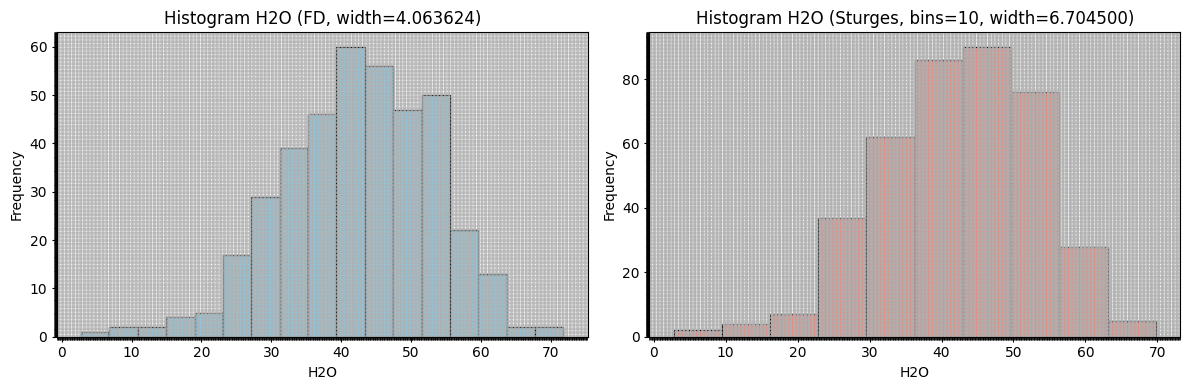


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,2.747000,6.810624,1
1,6.810624,10.874249,2
2,10.874249,14.937873,2
3,14.937873,19.001498,4
4,19.001498,23.065122,5
5,23.065122,27.128746,17
6,27.128746,31.192371,29
7,31.192371,35.255995,39
8,35.255995,39.319620,46
9,39.319620,43.383244,60



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,2.7470,9.4515,2
1,9.4515,16.1560,4
2,16.1560,22.8605,7
3,22.8605,29.5650,37
4,29.5650,36.2695,62
5,36.2695,42.9740,86
6,42.9740,49.6785,90
7,49.6785,56.3830,76
8,56.3830,63.0875,28
9,63.0875,69.7920,5


In [337]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="H2O"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_h2o(df_wetw):
    if 'H2O' not in df_wetw.columns:
        print("Kolom 'H2O' tidak ada di dataframe.")
        return

    data = df_wetw['H2O'].dropna()
    if data.empty:
        print("Tidak ada data 'H2O' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="H2O")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram H2O (FD, width={width_fd_str})")
    axes[0].set_xlabel("H2O")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram H2O (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("H2O")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
h2o_data = analyze_h2o(df_wetw)

In [338]:

import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_wetw berdasarkan H2O
df_h2o = df_wetw[(df_wetw['H2O'] >= lower_bound) &
                 (df_wetw['H2O'] <= upper_bound)].copy()

print(f"\nFiltered rows (H2O): {len(df_h2o)}")
display(df_h2o.head(10))

is greater than or equal to: 27.128746
is less than or equal to: 59.637741

Filtered rows (H2O): 349


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
955,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,0.85,1.00,0.15,1.35,0.944,40.042,0.566,Sap,None,ESAP,SAP,1.594493,0.956020,0.944,0.953138
2873,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,2.60,3.00,0.40,1.00,1.632,37.868,1.014,Sap,None,ESAP,SAP,1.395519,0.867069,1.632,1.935836
3008,CS6210146,Bintangor Blok 2 Spasi 25,BINTANGOR,3.00,3.50,0.50,1.00,1.882,33.900,1.244,Sap,None,ESAP,SAP,1.287435,0.850993,1.882,2.328915
3787,CS7210155,Bintangor Blok 1 Spasi 50,BINTANGOR,3.38,3.76,0.38,1.58,2.310,54.978,1.040,Sap,None,ESAP,SAP,1.315973,0.592473,2.310,1.857220
3795,CS7210120,Bintangor Blok 2 Spasi 50,BINTANGOR,3.40,4.00,0.60,1.65,2.718,49.080,1.384,Sap,None,ESAP,SAP,0.939053,0.478164,2.718,2.721994
3839,CS7210328,Bintangor Blok 1 Spasi 50,BINTANGOR,3.50,4.00,0.50,1.10,2.130,50.235,1.060,Sap,None,ESAP,SAP,1.324624,0.659203,2.130,2.328915
3879,CS7210162,Bintangor Blok 1 Spasi 50,BINTANGOR,3.50,4.00,0.50,1.50,2.770,54.513,1.260,Sap,None,SAP,SAP,1.263264,0.574626,2.770,2.328915
3905,CS7210334,Bintangor Blok 1 Spasi 50,BINTANGOR,3.60,4.00,0.40,1.50,2.444,36.007,1.564,Sap,None,ESAP,SAP,1.393239,0.891582,2.444,1.935836
3908,CS7210044,Bintangor Blok 2 Spasi 50,BINTANGOR,3.60,4.00,0.40,1.00,1.280,42.344,0.738,Sap,None,ESAP,SAP,1.094525,0.631062,1.280,1.935836
3961,CS7210127,Bintangor Blok 2 Spasi 50,BINTANGOR,3.70,4.65,0.95,1.00,3.594,40.568,2.136,Sap,None,SAP,SAP,1.293988,0.769048,3.594,4.097772


# Filter By DTF


Descriptive statistics for DTF:
Count: 349
Mean: 0.830008
Standard Error: 0.012468
Median: 0.798091096
Mode: 0.766167453
Standard Deviation: 0.232927
Sample Variance: 0.054255
Kurtosis: 7.164401
Skewness: 1.885380
Range: 1.811096724
Minimum: 0.405316264
Maximum: 2.216412988
Sum: 289.672945292
Confidence Level (95%): ±0.024523

Bin calculation:
Freedman–Diaconis -> bins=25, width=0.073913
Sturges -> bins=10, width=0.181110


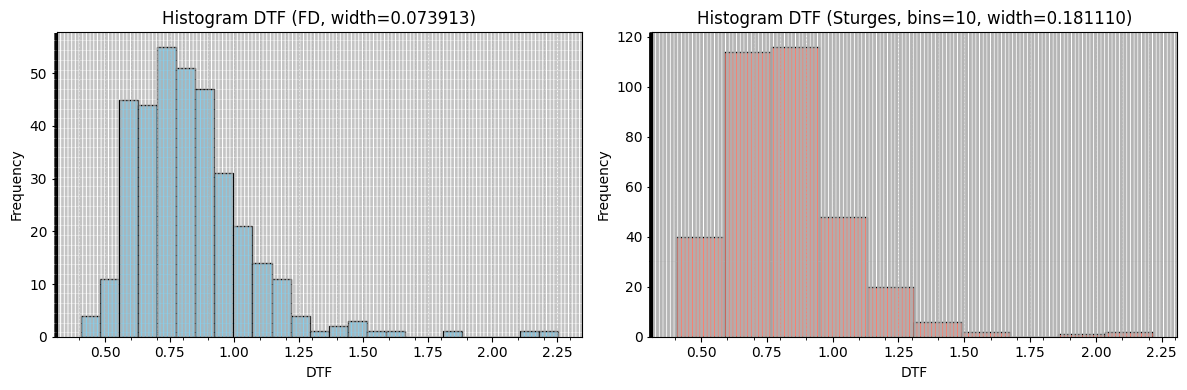


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.405316,0.479229,4
1,0.479229,0.553142,11
2,0.553142,0.627054,45
3,0.627054,0.700967,44
4,0.700967,0.774880,55
5,0.774880,0.848792,51
6,0.848792,0.922705,47
7,0.922705,0.996617,31
8,0.996617,1.070530,21
9,1.070530,1.144443,14



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.405316,0.586426,40
1,0.586426,0.767536,114
2,0.767536,0.948645,116
3,0.948645,1.129755,48
4,1.129755,1.310865,20
5,1.310865,1.491974,6
6,1.491974,1.673084,2
7,1.673084,1.854194,0
8,1.854194,2.035303,1
9,2.035303,2.216413,2


In [339]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="DTF"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_dtf(df_h2o):
    if 'DTF' not in df_h2o.columns:
        print("Kolom 'DTF' tidak ada di dataframe.")
        return

    data = df_h2o['DTF'].dropna()
    if data.empty:
        print("Tidak ada data 'DTF' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="DTF")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram DTF (FD, width={width_fd_str})")
    axes[0].set_xlabel("DTF")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram DTF (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("DTF")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
dtf_data = analyze_dtf(df_h2o)

In [340]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_h2o berdasarkan DTF
df_dtf = df_h2o[(df_h2o['DTF'] >= lower_bound) &
                (df_h2o['DTF'] <= upper_bound)].copy()

print(f"\nFiltered rows (DTF): {len(df_dtf)}")
display(df_dtf.head(400))

is greater than or equal to: 0.479229
is less than or equal to: 1.218355

Filtered rows (DTF): 330


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
955,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,0.85,1.00,0.15,1.35,0.944,40.042,0.566,Sap,None,ESAP,SAP,1.594493,0.956020,0.944,0.953138
2873,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,2.60,3.00,0.40,1.00,1.632,37.868,1.014,Sap,None,ESAP,SAP,1.395519,0.867069,1.632,1.935836
3008,CS6210146,Bintangor Blok 2 Spasi 25,BINTANGOR,3.00,3.50,0.50,1.00,1.882,33.900,1.244,Sap,None,ESAP,SAP,1.287435,0.850993,1.882,2.328915
3787,CS7210155,Bintangor Blok 1 Spasi 50,BINTANGOR,3.38,3.76,0.38,1.58,2.310,54.978,1.040,Sap,None,ESAP,SAP,1.315973,0.592473,2.310,1.857220
3839,CS7210328,Bintangor Blok 1 Spasi 50,BINTANGOR,3.50,4.00,0.50,1.10,2.130,50.235,1.060,Sap,None,ESAP,SAP,1.324624,0.659203,2.130,2.328915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11452,CS6210121,Bintangor Blok 2 Spasi 25,BINTANGOR,17.25,18.10,0.85,1.00,3.335,49.805,1.674,Sap,None,SAP,SAP,1.342000,0.673616,3.335,3.704693
11457,CS6210166,Bintangor Blok 2 Spasi 25,BINTANGOR,17.65,18.00,0.35,1.00,1.895,38.206,1.171,Sap,None,SAP,SAP,1.851897,1.144365,1.895,1.739296
11460,CS6210185,Bintangor Blok 2 Spasi 25,BINTANGOR,17.85,18.30,0.45,1.00,1.718,45.402,0.938,Sap,None,SAP,SAP,1.305829,0.712961,1.718,2.132376
11481,CS7210075,Bintangor Blok 2 Spasi 50,BINTANGOR,18.10,18.30,0.20,1.00,0.964,49.378,0.488,Sap,None,SAP,SAP,1.648628,0.834575,0.964,1.149677


# SUMMARY

In [341]:
import numpy as np
import scipy.stats as stats

def descriptive_stats(series, label):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

# --- Jalankan untuk semua kolom yang diminta ---
target_columns = ["Interval", "CoreRec", "WetW", "H2O", "DryW", "WTF", "DTF"]

for col in target_columns:
    if col in df_dtf.columns:
        descriptive_stats(df_dtf[col], label=col)
    else:
        print(f"\nKolom {col} tidak ditemukan di df_dtf.")


Descriptive statistics for Interval:
Count: 330
Mean: 0.473576
Standard Error: 0.009373
Median: 0.45
Mode: 0.5
Standard Deviation: 0.170263
Sample Variance: 0.028990
Kurtosis: -0.407025
Skewness: 0.389129
Range: 0.83
Minimum: 0.15
Maximum: 0.98
Sum: 156.28
Confidence Level (95%): ±0.018438

Descriptive statistics for CoreRec:
Count: 330
Mean: 1.120027
Standard Error: 0.010189
Median: 1.0
Mode: 1.0
Standard Deviation: 0.185084
Sample Variance: 0.034256
Kurtosis: 1.258717
Skewness: 1.415179
Range: 0.85
Minimum: 0.85
Maximum: 1.7
Sum: 369.60900000000004
Confidence Level (95%): ±0.020043

Descriptive statistics for WetW:
Count: 330
Mean: 2.149206
Standard Error: 0.040647
Median: 2.094
Mode: 2.78
Standard Deviation: 0.738385
Sample Variance: 0.545213
Kurtosis: -0.899166
Skewness: 0.173728
Range: 2.8360000000000003
Minimum: 0.856
Maximum: 3.692
Sum: 709.238
Confidence Level (95%): ±0.079960

Descriptive statistics for H2O:
Count: 330
Mean: 43.702721
Standard Error: 0.435605
Median: 43.819
M

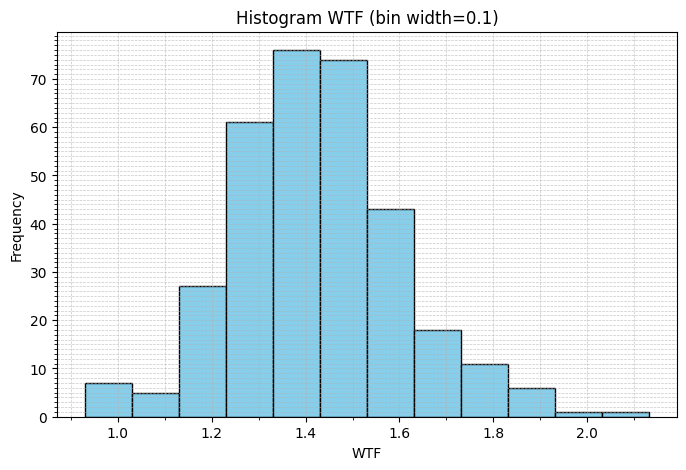


Tabel Histogram WTF:


,Bin Start,Bin End,Frequency
0,0.930605,1.030605,7
1,1.030605,1.130605,5
2,1.130605,1.230605,27
3,1.230605,1.330605,61
4,1.330605,1.430605,76
5,1.430605,1.530605,74
6,1.530605,1.630605,43
7,1.630605,1.730605,18
8,1.730605,1.830605,11
9,1.830605,1.930605,6


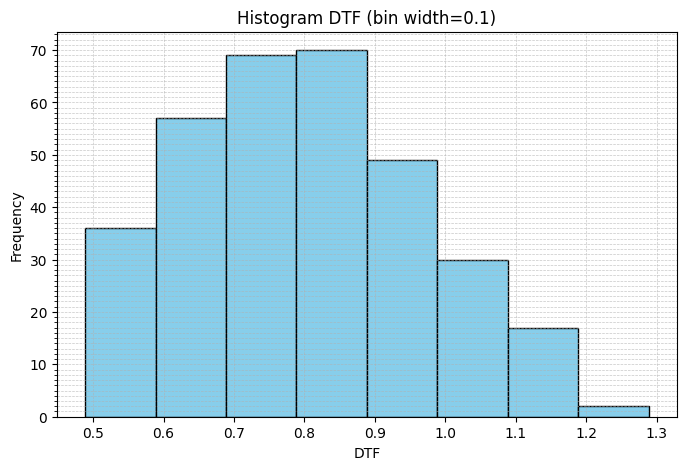


Tabel Histogram DTF:


,Bin Start,Bin End,Frequency
0,0.488627,0.588627,36
1,0.588627,0.688627,57
2,0.688627,0.788627,69
3,0.788627,0.888627,70
4,0.888627,0.988627,49
5,0.988627,1.088627,30
6,1.088627,1.188627,17
7,1.188627,1.288627,2


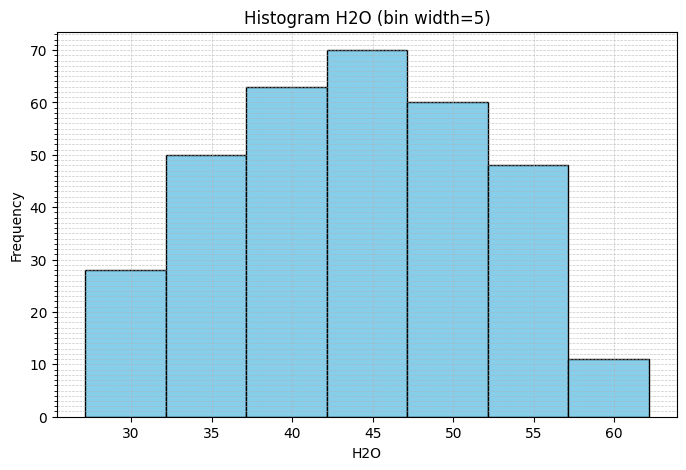


Tabel Histogram H2O:


,Bin Start,Bin End,Frequency
0,27.141,32.141,28
1,32.141,37.141,50
2,37.141,42.141,63
3,42.141,47.141,70
4,47.141,52.141,60
5,52.141,57.141,48
6,57.141,62.141,11


In [342]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator

def plot_histogram_fixed_width(series, bin_width, label):
    data = series.dropna().values
    if len(data) == 0:
        print(f"Tidak ada data untuk {label}.")
        return None

    # Tentukan bins berdasarkan bin_width
    min_val, max_val = data.min(), data.max()
    bins = np.arange(min_val, max_val + bin_width, bin_width)

    # Plot histogram
    plt.figure(figsize=(8,5))
    counts, edges, _ = plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram {label} (bin width={bin_width})")
    plt.xlabel(label)
    plt.ylabel("Frequency")

    # Minor ticks sesuai bin width
    plt.gca().xaxis.set_minor_locator(MultipleLocator(bin_width))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

    # Buat tabel histogram
    table = pd.DataFrame({
        "Bin Start": edges[:-1],
        "Bin End": edges[1:],
        "Frequency": counts.astype(int)
    })

    print(f"\nTabel Histogram {label}:")
    display(table)
    return table

# --- Contoh pemanggilan ---
table_wtf = plot_histogram_fixed_width(df_dtf['WTF'], bin_width=0.1, label="WTF")
table_dtf = plot_histogram_fixed_width(df_dtf['DTF'], bin_width=0.1, label="DTF")
table_h2o = plot_histogram_fixed_width(df_dtf['H2O'], bin_width=5, label="H2O")

In [343]:
import pandas as pd

# Input nama Block, GEN_LYR, dan Material
block_name = input("Masukkan nama Block: ")
gen_lyr = input("Masukkan GEN_LYR: ")
material = input("Masukkan Material: ")

# Hitung nilai ringkasan (contoh: mean)
summary = {
    "Block": block_name,
    "GEN_LYR": gen_lyr,
    "Material": material,
    "Interval_mean": df_dtf['Interval'].dropna().mean(),
    "CoreRec_mean": df_dtf['CoreRec'].dropna().mean(),
    "WetW_mean": df_dtf['WetW'].dropna().mean(),
    "H2O_mean": df_dtf['H2O'].dropna().mean(),
    "DryW_mean": df_dtf['DryW'].dropna().mean(),
    "WTF_mean": df_dtf['WTF'].dropna().mean(),
    "DTF_mean": df_dtf['DTF'].dropna().mean()
}

# Buat nama variabel DataFrame sesuai input
var_name = f"df_{block_name.replace(' ', '_').lower()}_{gen_lyr.lower()}_{material.lower()}"
globals()[var_name] = pd.DataFrame([summary])

print(f"\nTabel Ringkasan tersimpan sebagai variabel: {var_name}")
display(globals()[var_name])

Masukkan nama Block: Bintangor
Masukkan GEN_LYR: SAP
Masukkan Material: Sap

Tabel Ringkasan tersimpan sebagai variabel: df_bintangor_sap_sap


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Bintangor,SAP,Sap,0.473576,1.120027,2.149206,43.702721,1.210139,1.420367,0.802649


# Proporsional Averaging

In [285]:
import pandas as pd

# Gabungkan semua DataFrame jadi satu
df_belambus_selatan_brk_all = pd.concat([
    df_belambus_selatan_brk_altspt,
    df_belambus_selatan_brk_althgt,
    df_belambus_selatan_brk_br,
    df_belambus_selatan_brk_dnt,
    df_belambus_selatan_brk_hgt,
    df_belambus_selatan_brk_hshgt,
    df_belambus_selatan_brk_spt
], ignore_index=True)

# Cek hasil
print(df_belambus_selatan_brk_all.shape)
display(df_belambus_selatan_brk_all.head())

(7, 10)


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,BRK,ALT SPT,1.0,1.0,5.582000,8.883250,5.087000,1.903017,1.734262
1,Belambus Selatan,BRK,ALT-HGT,1.0,1.0,4.986667,3.139333,4.830000,1.700056,1.646645
2,Belambus Selatan,BRK,BR,1.0,1.0,5.229444,3.667778,5.036667,1.782824,1.717102
3,Belambus Selatan,BRK,DNT,1.0,1.0,6.222750,2.146750,6.089000,2.128423,2.082676
4,Belambus Selatan,BRK,HGT,1.0,1.0,5.497500,3.130750,5.325500,1.877266,1.818528


In [286]:
# Daftar material yang memang ada di hasil filter
materials_filter = df_belambus_selatan_brk_all['Material'].unique().tolist()

# Initialize df_raw with the df_block DataFrame
df_raw = df_block.copy()

# Filter raw data hanya untuk material yang relevan
df_raw_filtered = df_raw[df_raw['Material'].isin(materials_filter)]

# Hitung jumlah raw per material
raw_counts = df_raw_filtered['Material'].value_counts().reset_index()
raw_counts.columns = ['Material', 'Raw_Count']

# Hitung jumlah hasil filter per material
filtered_counts = df_belambus_selatan_brk_all['Material'].value_counts().reset_index()
filtered_counts.columns = ['Material', 'Filtered_Count']

# Gabungkan
summary = pd.merge(raw_counts, filtered_counts, on='Material', how='inner')

# Hitung persentase proporsi tiap material terhadap total raw relevan
summary['Percentage_of_Total'] = (summary['Raw_Count'] / summary['Raw_Count'].sum()) * 100

print("\nSummary per Material (hanya material relevan):")
display(summary)


Summary per Material (hanya material relevan):


,Material,Raw_Count,Filtered_Count,Percentage_of_Total
0,BR,44,1,23.783784
1,SPT,36,1,19.459459
2,HGT,35,1,18.918919
3,ALT SPT,23,1,12.432432
4,HS HGT,21,1,11.351351
5,DNT,16,1,8.648649
6,ALT-HGT,10,1,5.405405


In [287]:
import numpy as np
import pandas as pd

# --- 1. Buat mapping material -> proporsi (dari summary yang sudah dihitung sebelumnya) ---
weights_map = summary.set_index('Material')['Percentage_of_Total'] / 100.0

# --- 2. Fungsi untuk weighted descriptive statistics ---
def weighted_means(df, weights_map):
    stats = {}
    for col in ['Interval_mean','CoreRec_mean','WetW_mean','H2O_mean','DryW_mean','WTF_mean','DTF_mean']:
        values = df[col].values
        # Ambil bobot sesuai material tiap baris
        w = df['Material'].map(weights_map).values

        # Weighted mean
        mean = np.average(values, weights=w)

        # Simpan hasil
        stats[col] = mean

    return pd.DataFrame([stats])

# --- 3. Hitung descriptive statistics proporsional ---
summary_means = weighted_means(df_belambus_selatan_brk_all, weights_map)

print("\nDescriptive Statistics Proporsional (Material, Weighted Means):")
display(summary_means)


Descriptive Statistics Proporsional (Material, Weighted Means):


,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,1.0,1.0,5.381342,4.451587,5.144737,1.836069,1.755359
